In [1]:
import pypowsybl as pp

Load CGMES micro grids BE and NL

In [2]:
be = pp.network.load('data/MicroGridTestConfiguration_T4_BE_BB_Complete_v2.zip')
nl = pp.network.load('data/MicroGridTestConfiguration_T4_NL_BB_Complete_v2.zip')

Merge the NL into BE

In [3]:
be.merge(nl)
eu = be

Get all substations as a Pandas data frame

In [4]:
eu.get_substations()

,name,TSO,geo_tags,country
id,,,,
87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE
37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE
c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


Display the merged network

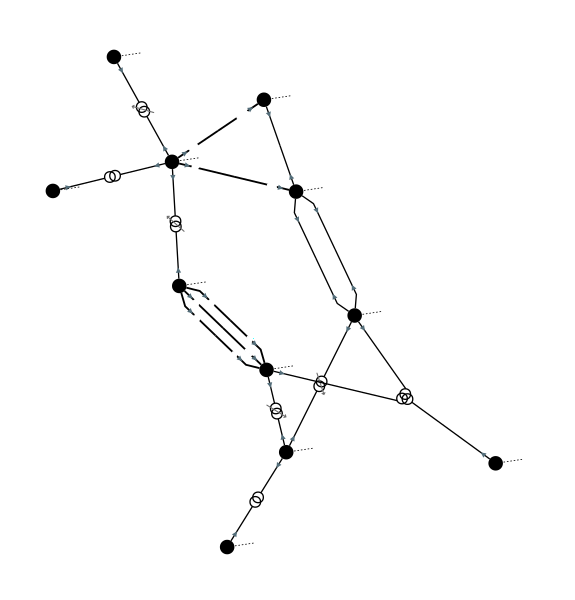

In [5]:
eu.get_network_area_diagram()

Run an AC load flow

In [6]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=7, slack_bus_id='8d8a82ba-b5b0-4e94-861a-192af055f2b8_0', slack_bus_active_power_mismatch=-0.6422024053976294, distributed_active_power=-42.0306813582755)]

Get active power setpoint of generator 3a3b27be-b18b-4385-b557-6735d733baf0

In [7]:
generators = eu.get_generators()
generators['target_p']['3a3b27be-b18b-4385-b557-6735d733baf0']

90.0

Update active power setpoint to 100 MW

In [8]:
eu.update_generators(id='3a3b27be-b18b-4385-b557-6735d733baf0', target_p=100)

Check active power setpoint has been updated

In [9]:
generators = eu.get_generators()
generators['target_p']['3a3b27be-b18b-4385-b557-6735d733baf0']

100.0

Re-run AC load flow with new setpoint

In [10]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=8, slack_bus_id='8d8a82ba-b5b0-4e94-861a-192af055f2b8_0', slack_bus_active_power_mismatch=-0.6271756962791031, distributed_active_power=-52.158863504083186)]

Get generators data frame

In [11]:
eu.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,rated_s,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,,
3a3b27be-b18b-4385-b557-6735d733baf0,BE-G1,OTHER,100.000000,50.0,200.0,NaN,NaN,300.0,CURVE,115.50000,100.256000,True,,-94.443575,68.910697,6496.030249,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386_0,True
550ebe0d-f2b2-48c1-991f-cebea43a21aa,BE-G2,OTHER,118.000000,50.0,200.0,-200.0,200.0,300.0,MIN_MAX,21.98700,18.720301,True,,-112.443575,-81.237872,3642.599909,929ba893-c9dc-44d7-b1fd-30834bd3ab85,929ba893-c9dc-44d7-b1fd-30834bd3ab85_0,True
2844585c-0d35-488d-a449-685bcd57afbf,NL-G2,OTHER,140.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,77.743000,True,,-133.054469,-12.061458,4815.533913,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
1dc9afba-23b5-41a0-8540-b479ed8baf4b,NL-G3,OTHER,150.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,83.296000,True,,-143.054469,-12.061458,5174.608371,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
9c3b8f97-7972-477d-9dc8-87365cc0ad0e,NL-G1,OTHER,600.492701,300.0,1000.0,0.0,600.0,1100.0,MIN_MAX,16.03350,386.922556,True,,-572.710575,-219.554563,22086.218322,8d8a82ba-b5b0-4e94-861a-192af055f2b8,8d8a82ba-b5b0-4e94-861a-192af055f2b8_0,True


Get lines data frame

In [12]:
eu.get_lines()

,name,r,x,g1,b1,g2,b2,p1,q1,i1,p2,q2,i2,voltage_level1_id,voltage_level2_id,bus1_id,bus2_id,connected1,connected2
id,,,,,,,,,,,,,,,,,,,
b58bf21a-096a-4dae-9a01-3f03b60c24c7,BE-Line_2,1.935,34.200000,0.000034,0.000021,0.000034,0.000021,-112.816018,15.283624,293.197333,116.711309,-8.302106,302.427956,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,d0486169-2205-40b2-895e-b672ecb9e5fc,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True
ffbabc27-1ccd-4fdc-b037-e341706c8d29,BE-Line_6,5.203,71.000000,0.000060,0.000010,0.000060,0.000010,-51.945971,8.279261,135.468753,58.275792,-4.904899,151.159015,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,d0486169-2205-40b2-895e-b672ecb9e5fc,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True
df16b3dd-c905-4a6f-84ee-f067be86f5da,SER-RLC-1230822986,0.000,-31.830989,0.000000,0.000000,0.000000,0.000000,-96.864653,17.198463,254.283458,96.864653,-23.373046,254.283458,d0486169-2205-40b2-895e-b672ecb9e5fc,69ef0dbd-da79-4eef-a02f-690cb8a28361,d0486169-2205-40b2-895e-b672ecb9e5fc_0,69ef0dbd-da79-4eef-a02f-690cb8a28361_0,True,True


Run sensitivity analysis:
 - node (generator 3a3b27be-b18b-4385-b557-6735d733baf0) to slack
 - zone (BE) to slack
 - zone (BE) to zone (NL) => PTDF

'b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc' is a BE/NL tieline

In [13]:
sa = pp.sensitivity.create_dc_analysis()
country_be = pp.sensitivity.create_country_zone(eu, 'BE')
country_nl = pp.sensitivity.create_country_zone(eu, 'NL')
sa.set_zones([country_be, country_nl])
sa.set_branch_flow_factor_matrix(branches_ids=['b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc'], variables_ids=['3a3b27be-b18b-4385-b557-6735d733baf0', 'BE', ('BE', 'NL')])
results = sa.run(eu)
results.get_branch_flows_sensitivity_matrix()

<enum 'ZoneKeyType'>
<enum 'ZoneKeyType'>
True
<enum 'ZoneKeyType'>
<enum 'ZoneKeyType'>
True


,b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc
3a3b27be-b18b-4385-b557-6735d733baf0,0.332025
BE,0.328701
BE -> NL,0.416422
